# Chapter 3

In the chapter 3 of "Web Scraping with Python" you were able to learn more about the following subjects:
* Tracking internal links of website
  * According to pattern
  * All internal links
* Website mapping
* Collecting data
* Tracking through internet

The following cells aim to practice the contents listed above. For any sugestions, contact *gabriel.vasconcelos@usp.br*

Use the website https://scraping-cap3.netlify.app/ to answer this notebook.

In [142]:
# Import BeautifulSoup and other libraries you find useful

#                                                          \\
#    ___  _  _ ___  ___   _   _  ___   ___   ___  ___       \\_
#   |   | | / |   |  |    |   | |     |   | |      |        ( _\
#   |---| |/  |---|  |    |   | |___  |---| | __   |        / \__
#   |   | |\  |   |  |    |   |     | |   | |   |  |       / _/`"`
#   |   | | \ |   | _|_   |___|  ___| |   | |___| _|_     {\  )_
#              Rebeca Vieira Carvalho                       `"""`  

# Import BeautifulSoup and other libraries you find useful
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError
from urllib.parse import urlparse
import networkx as nx
import re
import matplotlib.pyplot as plt
import random

In [143]:
# Get the website https://scraping-cap3.netlify.app/ and pass it to a BeautifulSoup object 
# with proper error handling

def getBsObject(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        print(e)
        return None
    except URLError as e:
        print(e)
        return None

    bs = BeautifulSoup(html, 'html.parser')
    return bs

### a.
Get all internal links from the domain.

In [144]:
# Code below
# Tip: use BFS algorithm to do a full mapping of the domain
def getPageInternalLinks(url):
    bsObject = getBsObject(url)
    domain = urlparse(url).netloc 
    domain = domain.replace('.', '\.')
    links = bsObject.find_all('a', {'href': re.compile(f'(^\.*\/.+$)|(^#.*)|(https:\/\/(.*\.)?{domain}\/?.*?)')})
    links = set([link.attrs['href'] for link in links])
    return links

In [145]:
url = 'https://scraping-cap3.netlify.app/index.html'
internalLinks = getPageInternalLinks(url)
internalLinks

{'./baixistas.html',
 './bandas.html',
 './bateristas.html',
 './guitarristas.html',
 './index.html',
 './tecladistas.html',
 './vocalistas.html'}

In [146]:
def formatLink(link):
    url = 'https://scraping-cap3.netlify.app/'
    if link.startswith('./'):
        url += link[2:]
    elif link.startswith('/'):
        url += link[1:]
    elif link.startswith('../'):
        url += link[3:]
    else:
        return link
    
    return url

def getInternalLinks(link):
    links = set()
    addedToQueue = {link}
    queue = [link]

    while len(queue) > 0:
        currPage = formatLink(queue.pop(0))
        links.add(currPage)
        pages = getPageInternalLinks(currPage)
        for page in pages:
            fpage = formatLink(page)
            if fpage not in addedToQueue:
                queue.append(fpage)
                addedToQueue.add(fpage)
    return links
    

In [147]:
allInternal = getInternalLinks('https://scraping-cap3.netlify.app/index.html')
allInternal

{'https://scraping-cap3.netlify.app/baixistas.html',
 'https://scraping-cap3.netlify.app/baixistas/Dee_Dee_Ramone.html',
 'https://scraping-cap3.netlify.app/baixistas/Geezer_Butler.html',
 'https://scraping-cap3.netlify.app/baixistas/John_Paul_Jones.html',
 'https://scraping-cap3.netlify.app/baixistas/Krist_Novoselic.html',
 'https://scraping-cap3.netlify.app/baixistas/Paul_McCartney.html',
 'https://scraping-cap3.netlify.app/baixistas/Roger_Glover.html',
 'https://scraping-cap3.netlify.app/baixistas/Simon_Gallup.html',
 'https://scraping-cap3.netlify.app/bandas.html',
 'https://scraping-cap3.netlify.app/bandas/Black_Sabbath.html',
 'https://scraping-cap3.netlify.app/bandas/Deep_Purple.html',
 'https://scraping-cap3.netlify.app/bandas/Led_Zeppelin.html',
 'https://scraping-cap3.netlify.app/bandas/Nirvana.html',
 'https://scraping-cap3.netlify.app/bandas/Ramones.html',
 'https://scraping-cap3.netlify.app/bandas/The_Beatles.html',
 'https://scraping-cap3.netlify.app/bandas/The_Cure.html'

### b.
Get all external links from the domain.

In [148]:
def getPageExternalLinks(url):
    try:
      bsObject = getBsObject(url)
      allTags = bsObject.find_all('a')
      allLinks = set([tag.attrs['href'] for tag in allTags if 'href' in tag.attrs and tag.attrs['href']])
      allLinks.difference_update(getPageInternalLinks(url))
    except:
      return None
    return allLinks

In [149]:
url = 'https://scraping-cap3.netlify.app/index.html'
externalLinks = getPageExternalLinks(url)
externalLinks

{'https://github.com/kibonusp',
 'https://www.linkedin.com/in/gabrielfreitas-xv/'}

### c.
Get the title of each page in the website, its url and the first paragraph.

In [150]:
# Code below
def getInfos(page):
    bsObject = getBsObject(page)
    try:
        title = bsObject.h1.getText()
    except:
        title = None
    try:
        paragraph = bsObject.p.getText()
    except:
        paragraph = None
    
    return {'url': page, 'title': title, 'firstParagraph': paragraph}

allInfos = list()
for page in allInternal:
    allInfos.append(getInfos(page))
allInfos


[{'url': 'https://scraping-cap3.netlify.app/baixistas.html',
  'title': 'Baixistas',
  'firstParagraph': None},
 {'url': 'https://scraping-cap3.netlify.app/baixistas/Roger_Glover.html',
  'title': 'Roger Glover',
  'firstParagraph': 'Roger David Glover (Brecon, 30 de novembro de 1945) é um músico, compositor e produtor musical. É mais conhecido por ser o baixista das bandas de hard rock Deep Purple e Rainbow.[1][2]'},
 {'url': 'https://scraping-cap3.netlify.app/bandas/Led_Zeppelin.html',
  'title': 'Led Zeppelin',
  'firstParagraph': 'Led Zeppelin foi uma banda britânica de rock formada em Londres, em 1968. Consistia no guitarrista Jimmy Page, no vocalista Robert Plant, no baixista e tecladista John Paul Jones e no baterista John Bonham. Seu som pesado e violento de guitarra, enraizado no blues e música psicodélica de seus dois primeiros álbuns, é frequentemente reconhecido como um dos fundadores do heavy metal. Seu estilo foi inspirado em uma grande variedade de influências, incluindo

### d.
Create an adjacency list of the domain (directed graph).

In [151]:
adjacencyList = {}
for page in allInternal:
    adjacencyList[page] = [formatLink(link) for link in getPageInternalLinks(page)]
    
adjacencyList

{'https://scraping-cap3.netlify.app/baixistas.html': ['https://scraping-cap3.netlify.app/index.html',
  'https://scraping-cap3.netlify.app/baixistas/John_Paul_Jones.html',
  'https://scraping-cap3.netlify.app/baixistas/Roger_Glover.html',
  'https://scraping-cap3.netlify.app/baixistas/Dee_Dee_Ramone.html',
  'https://scraping-cap3.netlify.app/baixistas.html',
  'https://scraping-cap3.netlify.app/bandas.html',
  'https://scraping-cap3.netlify.app/tecladistas.html',
  'https://scraping-cap3.netlify.app/baixistas/Simon_Gallup.html',
  'https://scraping-cap3.netlify.app/bateristas.html',
  'https://scraping-cap3.netlify.app/vocalistas.html',
  'https://scraping-cap3.netlify.app/baixistas/Paul_McCartney.html',
  'https://scraping-cap3.netlify.app/guitarristas.html',
  'https://scraping-cap3.netlify.app/baixistas/Geezer_Butler.html',
  'https://scraping-cap3.netlify.app/baixistas/Krist_Novoselic.html'],
 'https://scraping-cap3.netlify.app/baixistas/Roger_Glover.html': ['https://scraping-cap3

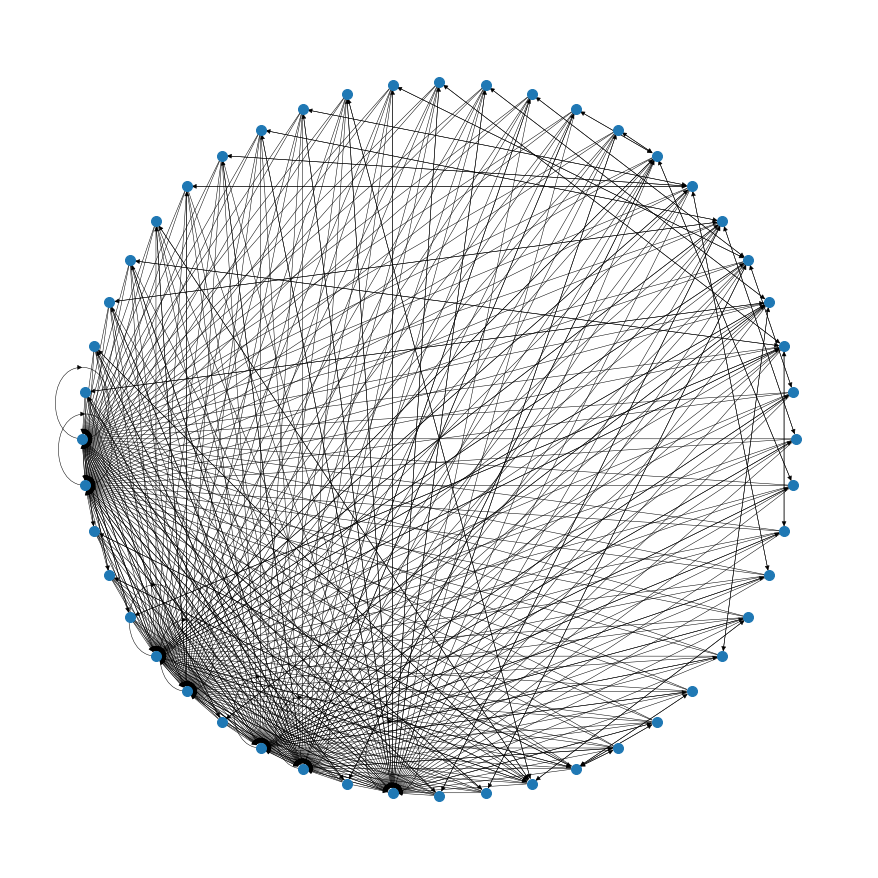

In [152]:
# Use networkx to generate a visualization of the graph
'''
Create an adjacency list in the following format:

adjacencyList = {
    'node A': ['nodeB', 'nodeC'],
    'node B': ['node C']
}
'''

G = nx.DiGraph()

for fromSite in adjacencyList:
    for toSite in adjacencyList[fromSite]:
        G.add_edge(fromSite, toSite)
        
nodes = list(G.nodes)
for node in nodes:
    if len(node) == 1:
        print(node)
        G.remove_node(node)
        
plt.figure(3,figsize=(12,12)) 
nx.draw(G, pos=nx.shell_layout(G), node_size=100, width=0.5)
plt.show()

### e.
From the website external links, choose one randomly and create a internet crawler.

In [153]:
def chooseExternalLink(link):
    if not link:
        return None
    allExternalLinks = getPageExternalLinks(link)
    if not allExternalLinks: 
      return None
    nextExternalLink = random.choice(list(allExternalLinks))
    if not nextExternalLink:
        internalLinks = getPageInternalLinks(link)
        i = 0
        while not nextExternalLink and i < len(internalLinks):
            nextExternalLink = chooseExternalLink(link + internalLinks[i])
            i += 1
        return nextExternalLink
    return nextExternalLink

def crawler(link):
    print(link)
    found = True
    foundedlinks = list()
    while found:
        link = chooseExternalLink(link)
        if link == None:
          found = False
        else:
          foundedlinks.append(link)
    return foundedlinks


In [141]:
# Procura uma sequencia de links até achar + que 5
links = crawler('https://scraping-cap3.netlify.app/index.html')
while len(links) < 5:
  links = crawler('https://scraping-cap3.netlify.app/index.html')
print(links)

https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
github\.blog
github\.com
www\.electronjs\.org
openjsf\.org
jobyaviation\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.instagram\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
twitter\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com


avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
twitter\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com


avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
web\.facebook\.com
fi-fi\.facebook\.com
l\.facebook\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
githu

avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
github\.blog
github\.com
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
<urlopen error unknown url type: mailto>
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
web\.facebook\.com
es-la\.facebook\.com
ru-ru\.facebook\.com
l\.facebook\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://

avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
<urlopen error unknown url type: mailto>
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
web\.facebook\.com
developers\.facebook\.com
www\.facebook\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.githubstatus\.com
HTTP Error 403: Forbidden
https://scraping-cap3.netlify

avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.githubstatus\.com
status\.github\.com
HTTP Error 403: Forbidden
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.githubstatus\.com
github\.com
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com

avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com


avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.instagram\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com


avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.instagram\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.instagram\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
github\.blog
github\.com
github\.blog
HTTP Error 403: Forbidden
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: 

avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
web\.facebook\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com


avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.instagram\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
twitter\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
twitter\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
<urlopen error unknown url type: mailto>
https://scr

avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com


avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
github\.blog
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.githubstatus\.com
twitter\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.instagram\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.githubstatus\.com
services\.github\.com
github\.com
www\.githubstatus\.com
www\.atlassian\.com
twitter\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
twitter\.com
https

avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.githubstatus\.com
github\.com
blog\.container-solutions\.com
www\.container-solutions\.com
www\.softwarecircus\.io
twitter\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request

avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.githubstatus\.com
electron\.atom\.io
code\.visualstudio\.com
support\.serviceshub\.microsoft\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
<urlopen error unknown url type: mailto>
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com


avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
web\.facebook\.com
pay\.facebook\.com
www\.facebook\.com
l\.facebook\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.n

avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
<urlopen error unknown url type: mailto>
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com


avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com


avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
github\.blog
www\.githubstatus\.com
HTTP Error 403: Forbidden
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.net

avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
github\.blog
HTTP Error 403: Forbidden
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
<urlopen er

avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
www\.instagram\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
twitter\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com


avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
twitter\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
<urlopen error unknown url type: mailto>
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https:

avatars\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
<urlopen error unknown url type: mailto>
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
<urlopen error unknown url type: mailto>
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
github\.com
camo\.githubusercontent\.com
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Error 999: Request denied
https://scraping-cap3.netlify.app/index.html
scraping-cap3\.netlify\.app
HTTP Erro